In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from matplotlib import pyplot as plt
import statsmodels.formula.api as sm
import streamlit as st

from pybaseball import statcast
from pybaseball import batting_stats
from pybaseball import pitching_stats
from pybaseball import playerid_lookup
from pybaseball import split_stats
from pybaseball import schedule_and_record
from pybaseball import statcast_batter
from pybaseball import player_search_list
from pybaseball import playerid_reverse_lookup

In [64]:
df = batting_stats(2014, 2017, qual=400)

In [65]:
pd.set_option('display.max_columns', 500)

In [66]:
pd.set_option('display.max_rows', 500)

In [67]:
df.head()

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,LD+%,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,11579,2015,Bryce Harper,WSN,22,153,521,654,172,91,38,1,42,118,99,124,15,131,5,4,0,15,6,4,0.330,151,154,87,9,2682,1180,1502,7,2,2,0.190,0.200,0.95,0.460,0.649,1.109,0.319,0.369,0.0098,0.222,0.385,0.393,0.058,0.273,0.046,1.000,0.461,77.3,151,74.1,-4.0,19.1,-6.1,87.8,9.3,$74.5,3.1,197,6.18,-9.26,15.43,75.27,8.04,1.01,NaN,0,8.17,-2.05,0.558,92.9,0.147,84.4,0.053,87.5,0.089,77.9,0.133,84.0,0.017,86.4,0.004,74.9,0.021,NaN,45.0,10.0,0.3,6.8,7.1,2.5,0.0,3.07,2.59,0.23,2.92,2.03,5.66,-0.04,0.276,0.725,0.447,0.609,0.844,0.754,0.380,0.546,0.108,3.6,0.340,0.129,0.053,0.017,NaN,0.092,0.141,0.073,0.023,0.001,0.126,NaN,0.003,NaN,93.1,92.6,87.6,84.3,NaN,92.4,84.4,78.0,79.5,65.3,83.9,NaN,76.0,-2.2,-4.4,0.5,-1.7,NaN,-1.9,0.7,2.0,3.4,3.1,-5.3,NaN,1.2,9.1,6.2,5.2,1.7,NaN,4.6,1.0,-5.3,-6.8,-9.7,4.3,NaN,-1.3,23.3,12.3,0.9,1.4,NaN,7.8,10.7,4.8,0.4,-0.1,9.7,NaN,0.1,2.62,3.63,0.66,3.15,NaN,3.22,2.90,2.52,0.70,-4.74,2.92,NaN,0.59,0.263,0.685,0.447,0.567,0.845,0.752,0.435,25.0,-10.2,-0.8,3.5,22 - 22,77.7,1.1,0.9,0.454,0.338,0.208,0.119,0.472,0.409,0.454,0.122,0.001,0.086,0.358,0.067,0.026,0.004,NaN,0.182,0.150,NaN,84.5,73.1,78.8,93.9,89.1,85.5,75.1,NaN,92.7,84.5,NaN,-5.7,5.3,3.1,-2.0,0.1,-2.1,1.0,NaN,-3.9,0.2,NaN,3.3,-14.1,-7.5,8.0,4.5,0.7,-2.8,NaN,4.5,-0.5,NaN,6.0,-0.1,7.1,22.3,0.4,3.4,0.0,NaN,22.3,10.7,NaN,1.86,-4.06,3.12,2.36,0.24,5.03,-0.04,NaN,4.67,2.70,NaN,0.265,0.681,0.446,0.564,0.847,0.752,0.435,25.0,NaN,127,239,101,142,158,213,121,1.04,85,119,244,119,95,79,66,91,137,91.4,14.6,48,0.122,116.0,188,0.477,394,0.118,0.226,NaN,NaN,NaN,9.3
10,10155,2015,Mike Trout,LAA,23,159,575,682,172,93,32

In [68]:
feared = df.loc[(df.PA >249) & (df.AVG > .270) &(df.OBP >= df.AVG +.09)]
feared

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,LD+%,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,11579,2015,Bryce Harper,WSN,22,153,521,654,172,91,38,1,42,118,99,124,15,131,5,4,0,15,6,4,0.330,151,154,87,9,2682,1180,1502,7,2,2,0.190,0.200,0.95,0.460,0.649,1.109,0.319,0.369,0.0098,0.222,0.385,0.393,0.058,0.273,0.046,1.000,0.461,77.3,151,74.1,-4.0,19.1,-6.1,87.8,9.3,$74.5,3.1,197,6.18,-9.26,15.43,75.27,8.04,1.01,NaN,0,8.17,-2.05,0.558,92.9,0.147,84.4,0.053,87.5,0.089,77.9,0.133,84.0,0.017,86.4,0.004,74.9,0.021,NaN,45.0,10.0,0.3,6.8,7.1,2.5,0.0,3.07,2.59,0.23,2.92,2.03,5.66,-0.04,0.276,0.725,0.447,0.609,0.844,0.754,0.380,0.546,0.108,3.6,0.340,0.129,0.053,0.017,NaN,0.092,0.141,0.073,0.023,0.001,0.126,NaN,0.003,NaN,93.1,92.6,87.6,84.3,NaN,92.4,84.4,78.0,79.5,65.3,83.9,NaN,76.0,-2.2,-4.4,0.5,-1.7,NaN,-1.9,0.7,2.0,3.4,3.1,-5.3,NaN,1.2,9.1,6.2,5.2,1.7,NaN,4.6,1.0,-5.3,-6.8,-9.7,4.3,NaN,-1.3,23.3,12.3,0.9,1.4,NaN,7.8,10.7,4.8,0.4,-0.1,9.7,NaN,0.1,2.62,3.63,0.66,3.15,NaN,3.22,2.90,2.52,0.70,-4.74,2.92,NaN,0.59,0.263,0.685,0.447,0.567,0.845,0.752,0.435,25.0,-10.2,-0.8,3.5,22 - 22,77.7,1.1,0.9,0.454,0.338,0.208,0.119,0.472,0.409,0.454,0.122,0.001,0.086,0.358,0.067,0.026,0.004,NaN,0.182,0.150,NaN,84.5,73.1,78.8,93.9,89.1,85.5,75.1,NaN,92.7,84.5,NaN,-5.7,5.3,3.1,-2.0,0.1,-2.1,1.0,NaN,-3.9,0.2,NaN,3.3,-14.1,-7.5,8.0,4.5,0.7,-2.8,NaN,4.5,-0.5,NaN,6.0,-0.1,7.1,22.3,0.4,3.4,0.0,NaN,22.3,10.7,NaN,1.86,-4.06,3.12,2.36,0.24,5.03,-0.04,NaN,4.67,2.70,NaN,0.265,0.681,0.446,0.564,0.847,0.752,0.435,25.0,NaN,127,239,101,142,158,213,121,1.04,85,119,244,119,95,79,66,91,137,91.4,14.6,48,0.122,116.0,188,0.477,394,0.118,0.226,NaN,NaN,NaN,9.3
10,10155,2015,Mike Trout,LAA,23,159,575,682,172,93,32

In [69]:
df["FEAR"] = (df.PA >249) & (df.AVG > .270) &(df.OBP >= df.AVG +.09)

In [112]:
df["FEARbutbad"] = (df.PA >249) & (df.AVG < .270) &(df.OBP >= df.AVG +.09)

In [8]:
#data.corr()

In [9]:
pd.crosstab(df["FEAR"], df["HR"])

HR,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,47,52,59
FEAR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1,8,10,16,25,19,22,30,21,37,32,27,31,34,40,31,34,30,20,20,25,18,33,28,20,24,19,19,11,11,17,9,4,9,5,6,4,6,8,3,5,4,4,2,1,1,2,0,0
True,0,0,0,0,1,0,0,1,2,0,0,1,0,2,0,0,2,1,4,1,1,2,1,2,1,2,1,1,2,5,1,1,3,2,1,1,3,2,0,2,0,1,1,0,0,0,0,1,1


In [70]:
df["diff"]= (df["OBP"]- df["AVG"])
df

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,LD+%,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR,FEAR,diff
0,11579,2015,Bryce Harper,WSN,22,153,521,654,172,91,38,1,42,118,99,124,15,131,5,4,0,15,6,4,0.330,151,154,87,9,2682,1180,1502,7,2,2,0.190,0.200,0.95,0.460,0.649,1.109,0.319,0.369,0.0098,0.222,0.385,0.393,0.058,0.273,0.046,1.000,0.461,77.3,151,74.1,-4.0,19.1,-6.1,87.8,9.3,$74.5,3.1,197,6.18,-9.26,15.43,75.27,8.04,1.01,NaN,0,8.17,-2.05,0.558,92.9,0.147,84.4,0.053,87.5,0.089,77.9,0.133,84.0,0.017,86.4,0.004,74.9,0.021,NaN,45.0,10.0,0.3,6.8,7.1,2.5,0.0,3.07,2.59,0.23,2.92,2.03,5.66,-0.04,0.276,0.725,0.447,0.609,0.844,0.754,0.380,0.546,0.108,3.6,0.340,0.129,0.053,0.017,NaN,0.092,0.141,0.073,0.023,0.001,0.126,NaN,0.003,NaN,93.1,92.6,87.6,84.3,NaN,92.4,84.4,78.0,79.5,65.3,83.9,NaN,76.0,-2.2,-4.4,0.5,-1.7,NaN,-1.9,0.7,2.0,3.4,3.1,-5.3,NaN,1.2,9.1,6.2,5.2,1.7,NaN,4.6,1.0,-5.3,-6.8,-9.7,4.3,NaN,-1.3,23.3,12.3,0.9,1.4,NaN,7.8,10.7,4.8,0.4,-0.1,9.7,NaN,0.1,2.62,3.63,0.66,3.15,NaN,3.22,2.90,2.52,0.70,-4.74,2.92,NaN,0.59,0.263,0.685,0.447,0.567,0.845,0.752,0.435,25.0,-10.2,-0.8,3.5,22 - 22,77.7,1.1,0.9,0.454,0.338,0.208,0.119,0.472,0.409,0.454,0.122,0.001,0.086,0.358,0.067,0.026,0.004,NaN,0.182,0.150,NaN,84.5,73.1,78.8,93.9,89.1,85.5,75.1,NaN,92.7,84.5,NaN,-5.7,5.3,3.1,-2.0,0.1,-2.1,1.0,NaN,-3.9,0.2,NaN,3.3,-14.1,-7.5,8.0,4.5,0.7,-2.8,NaN,4.5,-0.5,NaN,6.0,-0.1,7.1,22.3,0.4,3.4,0.0,NaN,22.3,10.7,NaN,1.86,-4.06,3.12,2.36,0.24,5.03,-0.04,NaN,4.67,2.70,NaN,0.265,0.681,0.446,0.564,0.847,0.752,0.435,25.0,NaN,127,239,101,142,158,213,121,1.04,85,119,244,119,95,79,66,91,137,91.4,14.6,48,0.122,116.0,188,0.477,394,0.118,0.226,NaN,NaN,NaN,9.3,True,0.130
10,10155,2015,Mike Trout,LAA,23,

In [109]:
result = sm.ols('WAR ~ diff', data = df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    WAR   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     65.96
Date:                Thu, 11 May 2023   Prob (F-statistic):           1.64e-15
Time:                        14:12:25   Log-Likelihood:                -1728.3
No. Observations:                 839   AIC:                             3461.
Df Residuals:                     837   BIC:                             3470.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9228      0.195      4.733      0.000       0.540       1.305
diff          22.4900      2.769      8.122      0.000      17.055      27.925
==============================================================================
Omnibus:                       21.105   Durbin-Watson:                   1.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.242
Skew:                           0.399   Prob(JB):                     1.48e-05
Kurtosis:                       3.013   Cond. No.                         42.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

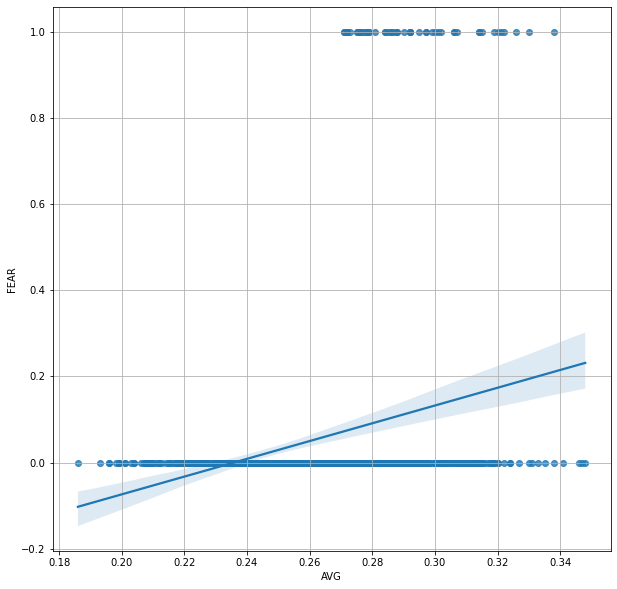

In [143]:
plt.figure(figsize=(10,10))

sns.regplot(x = df["AVG"], y = df["FEAR"], fit_reg = True)

plt.grid()

In [13]:
df["HR"].groupby(df["FEAR"]).mean()

FEAR
False    17.185751
True     26.566038
Name: HR, dtype: float64

In [14]:
df["HR"].groupby(df["FEAR"]).std()

FEAR
False     9.593581
True     11.027081
Name: HR, dtype: float64

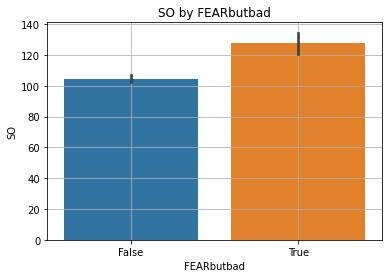

In [117]:
plt.figure()
sns.barplot(data = df, x = "FEARbutbad", y = "SO", ci = 95)

plt.title('SO by FEARbutbad')
plt.grid()

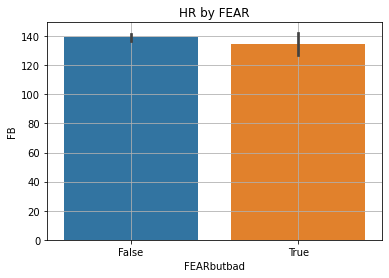

In [151]:
plt.figure()
sns.barplot(data = df, x = "FEARbutbad", y = "FB", ci = 95)

plt.title('HR by FEAR')
plt.grid()

In [16]:
!pip freeze | findstr seaborn

seaborn @ file:///tmp/build/80754af9/seaborn_1629307859561/work


In [17]:
#pybaseball.cache.enable()

In [18]:
cast = statcast('2014-04-01', '2017-09-30')

This is a large query, it may take a moment to complete
Skipping offseason dates
Skipping offseason dates
Skipping offseason dates


100%|████████████████████████████████████████████████████████████████████████████████| 819/819 [05:32<00:00,  2.47it/s]


In [19]:
cast.head(5)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
2407,FF,2017-09-30,102.6,0.85,6.09,"Chapman, Aroldis",446381,547973,field_out,hit_into_play,<NA>,<NA>,<NA>,<NA>,1,Darwin Barney lines out to second baseman Star...,R,R,L,NYY,TOR,X,4,line_drive,2,2,2017,0.03,1.76,-0.5,3.27,<NA>,<NA>,<NA>,2,9,Top,153.66,136.0,<NA>,<NA>,596142,<NA>,NaN,-3.939165,-149.171728,-7.142352,1.349246,36.640347,-3.864377,3.2,1.29,182,67.0,21,103.7,2650,7.0,492513,547973,596142,595885,516770,453943,544369,458731,453056,543305,53.53,0.773,0.696,0.0,1,0,0,4,66,5,4-Seam Fastball,2,1,1,2,1,2,1,2,Standard,Standard,179,0.035,-0.089
2522,FF,2017-09-30,102.9,0.64,6.23,"Chapman, Aroldis",446381,547973,None,ball,<NA>,<NA>,<NA>,<NA>,12,Darwin Barney lines out to second baseman Star...,R,R,L,NYY,TOR,B,<NA>,None,1,2,2017,0.71,1.69,1.02,3.1,<NA>,<NA>,<NA>,2,9,Top,<NA>,<NA>,<NA>,<NA>,596142,<NA>,NaN,-0.622833,-149.084179,-7.609757,10.612312,44.228609,-5.320129,3.43,1.54,<NA>,<NA>,<NA>,101.9,2520,6.5,492513,547973,596142,595885,516770,453943,544369,458731,453056,543305,53.97,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,66,4,4-Seam Fastball,2,1,1,2,1,2,1,2,Standard,Standard,156,0.0,0.016
2537,SL,2017-09-30,87.1,0.67,6.27,"Chapman, Aroldis",446381,547973,None,called_strike,<NA>,<NA>,<NA>,<NA>,9,Darwin Barney lines out to second baseman Star...,R,R,L,NYY,TOR,S,<NA>,None,1,1,2017,-0.92,0.48,0.32,2.08,<NA>,<NA>,<NA>,2,9,Top,<NA>,<NA>,<NA>,<NA>,596142,<NA>,NaN,1.030405,-126.60036,-4.838302,-10.072261,25.988551,-26.257229,3.39,1.5,<NA>,<NA>,<NA>,86.7,2540,6.1,492513,547973,596142,595885,516770,453943,544369,458731,453056,543305,54.38,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,66,3,Slider,2,1,1,2,1,2,1,2,Standard,Standard,250,0.0,-0.029
2728,FF,2017-09-30,101.9,0.8,6.31,"Chapman, Aroldis",446381,547973,None,ball,<NA>,<NA>,<NA>,<NA>,12,Darwin Barney lines out to second baseman Star...,R,R,L,NYY,TOR,B,<NA>,None,0,1,2017,0.25,2.11,1.01,4.44,<NA>,<NA>,<NA>,2,9,Top,<NA>,<NA>,<NA>,<NA>,596142,<NA>,NaN,-0.026539,-148.062134,-5.079666,3.792191,35.955908,0.137183,3.38,1.47,<NA>,<NA>,<NA>,102.4,2579,6.7,492513,547973,596142,595885,516770,453943,544369,458731,453056,543305,53.83,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,66,2,4-Seam Fastball,2,1,1,2,1,2,1,2,Standard,Standard,173,0.0,0.014
2789,FF,2017-09-30,101.1,0.81,6.21,"Chapman, Aroldis",446381,547973,None,swinging_strike,<NA>,<NA>,<NA>,<NA>,11,Darwin Barney lines out to second baseman Star...,R,R,L,NYY,TOR,S,<NA>,None,0,0,2017,0.04,1.87,-0.9,3.26,<NA>,<NA>,<NA>,2,9,Top,<NA>,<NA>,<NA>,<NA>,596142,<NA>,NaN,-4.882144,-146.700822,-7.392672,1.808588,36.35955,-3.233942,3.2,1.29,<NA>,<NA>,<NA>,101.5,2569,6.7,492513,547973,596142,595885,516770,453943,544369,458731,453056,543305,53.76,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,66,1,4-Seam Fastball,2,1,1,2,1,2,1,2,Standard,Standard,179,0.0,-0.018


In [20]:
cast.batter.unique()

<IntegerArray>
[446381, 431145, 430832, 595885, 516770, 544369, 475253, 518626, 606192,
 572365,
 ...
 534576, 543643, 136460, 440251, 459987, 430895, 434884, 462956, 430583,
 523848]
Length: 1664, dtype: Int64

In [21]:
pd.crosstab(cast["launch_angle"], (cast["pitch_type"]== "FF"))

pitch_type,False,True
launch_angle,,
-89,2,0
-88,4,0
-87,7,2
-86,3,2
-85,11,2
-84,10,0
-83,19,5
-82,24,6
-81,22,8


In [23]:
#feared2 = cast.loc[(cast.pitch_type == "FF") & cast.launch_angle]

In [24]:
feared_player_season_ids = feared.loc[:, ['IDfg', 'Season']]

In [25]:
new_df = df.rename(columns={'IDfg': 'batter', 'Season': 'game_year'})

In [26]:
any(cast['batter'] == 13611)

False

In [27]:
any(new_df['batter'] == 518692)

False

In [28]:
new_df.shape

(839, 322)

In [29]:
playerid_lookup('Harper')

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,harper,None,-1,None,harpe04,-1,1945.0,1945.0
1,harper,travis,150135,harpt002,harpetr01,1211,2000.0,2006.0
2,harper,john,-1,None,harpejo01,-1,1923.0,1925.0
3,harper,terry,115494,harpt001,harpete01,1005382,1980.0,1987.0
4,harper,tommy,115495,harpt101,harpeto01,1005383,1962.0,1976.0
5,harper,george,115490,harpg102,harpege01,1005377,1894.0,1896.0
6,harper,ryne,607560,harpr001,harpery01,12680,2019.0,2021.0
7,harper,brandon,276353,harpb002,harpebr02,2387,2006.0,2006.0
8,harper,jack,115489,harpj102,harpeja01,1005380,1899.0,1906.0
9,harper,walter,-1,None,harpewa01,-1,1929.0,1931.0


In [30]:
#once I get the dfs to merge/join I want to look at feared hitters avg launch angle against fastballs

#create a new dataframe that is only FF
# fearedcast = cast.loc[(df.Pitch_type == "FF")]

#then group avg launch angle by feared hitters
#fearedcast["launch_angle"].groupby(fearedcast["FEAR"]).mean()

#run/plot some regressions

In [31]:
# Feel like I need to use this to apply my dictionary to a column in dataframe ore merge
#.apply(lambda x: d.get(x)) where d is the dictionary

#use this to make the dictionary?
#df.groupby('key')['value'].apply(list).to_dict()

In [32]:
playid = player_search_list([("cabrera","miguel")])
playid

C:\Users\baxte\anaconda3\lib\site-packages\pybaseball\playerid_lookup.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(self.search(last, first), ignore_index=True)


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,cabrera,miguel,408234,cabrm001,cabremi01,1744,2003.0,2023.0


In [33]:
player_ids = cast["batter"]

In [57]:
newid = playerid_reverse_lookup(player_ids, key_type='mlbam')
newid

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,sadler,casey,594987,sadlc002,sadleca02,11209,2014.0,2021.0
1,zastryzny,rob,642239,zastr001,zastrro01,15094,2016.0,2023.0
2,ramirez,hanley,434670,ramih003,ramirha01,8001,2005.0,2019.0
3,smith,tyler,642094,smitt002,smithty01,12490,2017.0,2017.0
4,sipp,tony,448609,sippt001,sippto01,8280,2009.0,2019.0
...,...,...,...,...,...,...,...,...
1655,eaton,adam,594809,eatoa002,eatonad02,11205,2012.0,2021.0
1656,turley,nik,543867,turln001,turleni01,5530,2017.0,2020.0
1657,richard,clayton,453385,richc002,richacl01,3551,2008.0,2019.0
1658,hawkins,latroy,115629,hawkl001,hawkila01,729,1995.0,2015.0


In [35]:
otherplayerid = df["IDfg"]

In [36]:
newerid = playerid_reverse_lookup(otherplayerid, key_type='fangraphs')
newerid

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,ramirez,hanley,434670,ramih003,ramirha01,8001,2005.0,2019.0
1,ramos,wilson,467092,ramow001,ramoswi01,1433,2010.0,2021.0
2,nava,daniel,537953,navad002,navada01,5450,2010.0,2017.0
3,lowrie,jed,476704,lowrj001,lowrije01,4418,2008.0,2022.0
4,adams,matt,571431,adamm002,adamsma01,9393,2012.0,2021.0
5,davidson,matt,571602,davim005,davidma02,7226,2013.0,2022.0
6,davis,khris,501981,davik003,daviskh01,9112,2013.0,2021.0
7,mesoraco,devin,519023,mesod001,mesorde01,5666,2011.0,2018.0
8,judge,aaron,592450,judga001,judgeaa01,15640,2016.0,2023.0
9,crisp,coco,424825,crisc001,crispco01,1572,2002.0,2016.0


In [62]:
#df.groupby('key')['value'].apply(list).to_dict()

TypeError: unhashable type: 'Series'

In [63]:
#df.head(5)

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,LD+%,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR,FEAR,diff,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,11579,2015,Bryce Harper,WSN,22,153,521,654,172,91,38,1,42,118,99,124,15,131,5,4,0,15,6,4,0.33,151,154,87,9,2682,1180,1502,7,2,2,0.19,0.2,0.95,0.46,0.649,1.109,0.319,0.369,0.0098,0.222,0.385,0.393,0.058,0.273,0.046,1.0,0.461,77.3,151,74.1,-4.0,19.1,-6.1,87.8,9.3,$74.5,3.1,197,6.18,-9.26,15.43,75.27,8.04,1.01,NaN,0,8.17,-2.05,0.558,92.9,0.147,84.4,0.053,87.5,0.089,77.9,0.133,84.0,0.017,86.4,0.004,74.9,0.021,NaN,45.0,10.0,0.3,6.8,7.1,2.5,0.0,3.07,2.

In [71]:
df = df.merge(newid, left_on='IDfg', right_on='key_fangraphs')

In [74]:
#new_df = pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])
new_df = df.merge(cast, left_on=['key_mlbam', "Season"], right_on=['batter', 'game_year'])

MemoryError: Unable to allocate 752. MiB for an array with shape (54, 1826284) and data type int64

In [75]:
new_df.head(5)

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,LD+%,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR,FEAR,diff,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,11579,2015,Bryce Harper,WSN,22,153,521,654,172,91,38,1,42,118,99,124,15,131,5,4,0,15,6,4,0.33,151,154,87,9,2682,1180,1502,7,2,2,0.19,0.2,0.95,0.46,0.649,1.109,0.319,0.369,0.0098,0.222,0.385,0.393,0.058,0.273,0.046,1.0,0.461,77.3,151,74.1,-4.0,19.1,-6.1,87.8,9.3,$74.5,3.1,197,6.18,-9.26,15.43,75.27,8.04,1.01,NaN,0,8.17,-2.05,0.558,92.9,0.147,84.4,0.053,87.5,0.089,77.9,0.133,84.0,0.017,86.4,0.004,74.9,0.021,NaN,45.0,10.0,0.3,6.8,7.1,2.5,0.0,3.07,2.

In [81]:
new_df_FF = new_df.loc[(new_df.pitch_type == "FF")]

In [95]:
hit_launch_id = new_df_FF.groupby(['pitch_type', 'key_mlbam', "FEAR"])['launch_angle'].mean()
hit_launch_id

pitch_type  key_mlbam  FEAR 
FF          116338     False    21.488095
            116539     False         <NA>
            120074     False    24.740821
            121347     False    17.840237
            133380     False    20.113095
            134181     False    24.947183
            136860     False    24.846026
            150029     False    30.231405
                       True          <NA>
            150212     False    11.764706
            150229     False    15.609023
            276055     False         <NA>
            276519     False    24.909091
            346874     False         <NA>
            400085     False    10.538012
            400121     False    23.374608
            400284     False    19.307471
            405395     False    24.268698
            407781     False    22.301471
            407812     False    24.167213
                       True          <NA>
            407886     False         <NA>
            407893     False    20.507645
     

In [89]:
playerid_reverse_lookup(hit_launch_id, key_type='mlbam')

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last


In [98]:
scary = new_df_FF.groupby(['pitch_type', 'FEAR'])['launch_angle'].mean()
scary

pitch_type  FEAR 
FF          False     22.19264
            True     23.580061
Name: launch_angle, dtype: Float64

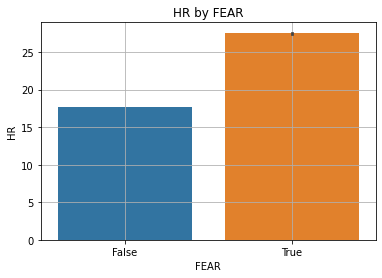

In [104]:
plt.figure()
sns.barplot(data = new_df_FF, x = "FEAR", y = "HR", ci = 95)

plt.title('HR by FEAR')
plt.grid()

In [106]:
mod1 = sm.logit('launch_angle ~ HR + FEAR', data=new_df_FF).fit()

mod1.summary()

TypeError: Cannot interpret 'Int64Dtype()' as a data type

In [100]:
#plt.figure(figsize=(10,10))

#sns.regplot(x = new_df_FF["FEAR"], y = new_df_FF["pitch_type"], fit_reg = True)

#plt.grid()

In [46]:

#df["pitch_type"].replace("FF", 1, inplace =True)
#df["pitch_type"].replace("SI", 2, inplace =True)
#df["pitch_type"].replace("CH", 3, inplace =True)
#df["pitch_type"].replace("CU", 4, inplace =True)
#df["pitch_type"].replace("SL", 5, inplace =True)
#df["pitch_type"].replace("FC", 6, inplace =True)
#df["pitch_type"].replace("KC", 7, inplace =True)
#df["pitch_type"].replace("IN", 8, inplace =True)
#df["pitch_type"].replace("EP", 9, inplace =True)
#df["pitch_type"].replace("KN", 10, inplace =True)
#df["pitch_type"].replace("FS", 11, inplace =True)
#df["pitch_type"].replace("ST", 12, inplace =True)
#df["pitch_type"].replace("SV", 13, inplace =True)
#df["pitch_type"].replace("nan", 14, inplace =True)

In [55]:
#scary

pitch_type  launch_angle
1           -87             0.000000
            -86             0.000000
            -85             0.166667
            -83             0.071429
            -82             0.000000
                              ...   
SC          32              0.000000
            36              0.000000
            53              0.000000
            61              0.000000
            74              0.000000
Name: FEAR, Length: 1960, dtype: float64